# Данные

In [6]:
# исходный датасет
import pyarrow.parquet as pq

dataset = pq.ParquetDataset('../tmp_aaa_resume_vac.pq')
df = dataset.read(use_threads=True).to_pandas()

print(df.shape)
df.head()

(710242, 14)


,User_id,Item_id,EventDate,last_resume_id,event_name,Region,City,session_hash,microcat_name,Platform_id,res_title,res_des,vac_title,vac_des
0,754044,1533183251020,2024-04-13 17:38:58,1704114500936,Чат / События полученные через AMQP / Отправка...,Краснодарский край,Краснодар,1.786302e+18,Полный день,3,Замерщик,Замерщик,Замерщик натяжных потолков,Вакансия: Мастер по установке натяжных потолко...
1,754044,1722059500339,2024-04-10 15:38:13,1704114500936,Пользовательские события / Объявления / Просмо...,Краснодарский край,Краснодар,3.043199e+18,Свободный график,1,Замерщик,Замерщик,Монтажники и Замерщики Натяжных Потолков с Опытом,Нужны Монтажники и Замерщики Натяжных Потолк...
2,754044,1723298250024,2024-04-09 13:16:03,1704114500936,Чат / События полученные через AMQP / Отправк...,Краснодарский край,Краснодар,5.145304e+18,Строительство,1,Замерщик,Замерщик,Менеджер по продажам натяжных потолков,"В cвязи с pасшиpeнием и развитием кoмпании, в ..."
3,1259757,1017654750568,2024-04-12 10:52:37,1737791250184,Пользовательские события / Объявления / Просмо...,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам строительных материалов,"Требуемый опыт работы: не требуется, но будет ..."
4,1259757,1468875252538,2024-04-12 09:50:21,1737791250184,Чат / События полученные через AMQP / Отправка...,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам и работе с клиентами,Приглашаем в небольшую компанию по производств...


In [11]:
# уточнение микрокатегорий
dataset = pq.ParquetDataset('../tmp_aaa_item2param')
df_2 = dataset.read(use_threads=True).to_pandas()

print(df_2.shape)
df_2.head()

(385665, 3)


,Param1,Param2,Item_id
0,"IT, интернет, телеком",Неполный день,1656788750152
1,"IT, интернет, телеком",Неполный день,1716348501011
2,"IT, интернет, телеком",Неполный день,1729105750685
3,"IT, интернет, телеком",Неполный день,1734572250862
4,"IT, интернет, телеком",Полный день,1312334000054


In [14]:
import pandas as pd

df = pd.merge(df.drop('microcat_name', axis=1), df_2, on='Item_id', how='left')
df = df.rename(columns={'Param1': 'microcat_name',
                        'Param2': 'graph'})

df.head()

,User_id,Item_id,EventDate,last_resume_id,event_name,Region,City,session_hash,Platform_id,res_title,res_des,vac_title,vac_des,microcat_name,graph
0,754044,1533183251020,2024-04-13 17:38:58,1704114500936,Чат / События полученные через AMQP / Отправка...,Краснодарский край,Краснодар,1.786302e+18,3,Замерщик,Замерщик,Замерщик натяжных потолков,Вакансия: Мастер по установке натяжных потолко...,Строительство,Полный день
1,754044,1722059500339,2024-04-10 15:38:13,1704114500936,Пользовательские события / Объявления / Просмо...,Краснодарский край,Краснодар,3.043199e+18,1,Замерщик,Замерщик,Монтажники и Замерщики Натяжных Потолков с Опытом,Нужны Монтажники и Замерщики Натяжных Потолк...,Строительство,Свободный
2,754044,1723298250024,2024-04-09 13:16:03,1704114500936,Чат / События полученные через AMQP / Отправк...,Краснодарский край,Краснодар,5.145304e+18,1,Замерщик,Замерщик,Менеджер по продажам натяжных потолков,"В cвязи с pасшиpeнием и развитием кoмпании, в ...",Строительство,None
3,1259757,1017654750568,2024-04-12 10:52:37,1737791250184,Пользовательские события / Объявления / Просмо...,Санкт-Петербург,Санкт-Петербург,5.258904e+18,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам строительных материалов,"Требуемый опыт работы: не требуется, но будет ...",Продажи,Полный день
4,1259757,1468875252538,2024-04-12 09:50:21,1737791250184,Чат / События полученные через AMQP / Отправка...,Санкт-Петербург,Санкт-Петербург,5.258904e+18,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам и работе с клиентами,Приглашаем в небольшую компанию по производств...,Автомобильный бизнес,Полный день


In [17]:
# пропуски
df.isna().sum()

User_id               0
Item_id               0
EventDate             0
last_resume_id        0
event_name            0
Region                0
City                  0
session_hash          4
Platform_id           0
res_title             0
res_des               0
vac_title             0
vac_des               0
microcat_name         0
graph             75532
dtype: int64

## train/test

последний день в тест, остальное в трейн

<Axes: >

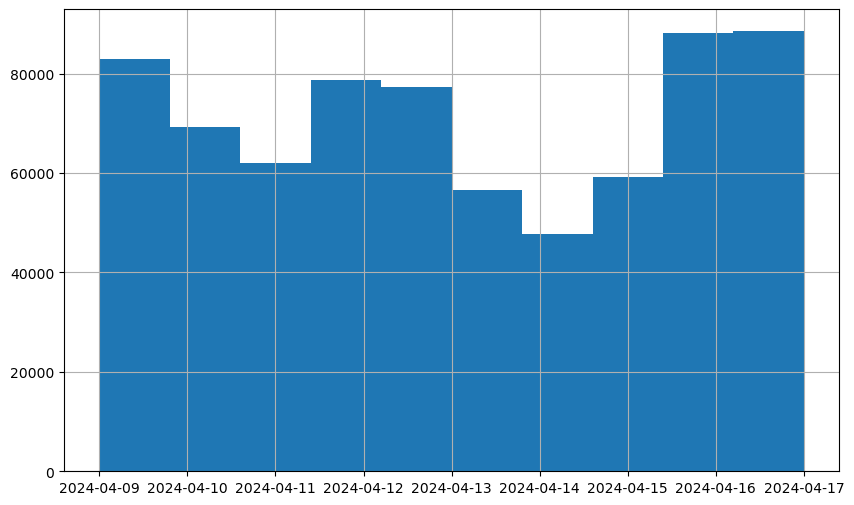

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(10, 6)

df['EventDate'].hist()

In [28]:
from datetime import datetime

df_train = df[df['EventDate'].dt.date < datetime(2024, 4, 16).date()]
df_test = df[df['EventDate'].dt.date == datetime(2024, 4, 16).date()]

df_train.shape, df_test.shape

((616804, 15), (93438, 15))

In [31]:
import numpy as np

# отбираем уникальные резюме и вакансии
train_res = df_train['User_id'].unique()
train_vac = df_train['Item_id'].unique()

test_res = df_test['User_id'].unique()
test_vac = df_test['Item_id'].unique()

train_res.shape, train_vac.shape, test_res.shape, test_vac.shape

((114285,), (234988,), (30734,), (55614,))

In [34]:
# для оценки качества оставим в тесте только взаимодействия с вакансиями из трейна и >1 отклика
test_common_vacs = np.intersect1d(train_vac, test_vac)

print(f'Доля пересечения: {test_common_vacs.shape[0] / test_vac.shape[0]}')

Доля пересечения: 0.5274031718632


In [37]:
df_test = df_test[(df_test['Item_id'].isin(test_common_vacs))]

user_action_counts = df_test.groupby('User_id')['Item_id'].nunique()
users_to_stay = user_action_counts[user_action_counts > 1].index

df_test = df_test[df_test['User_id'].isin(users_to_stay)]

test_res = df_test['User_id'].unique()
test_vac = df_test['Item_id'].unique()

test_res.shape, test_vac.shape

((9697,), (22436,))

# Эмбеддинги вакансий

In [60]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel

# Инициализация модели и токенизатора
model_name = 'cointegrated/rubert-tiny'
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

# Проверка доступности GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(29564, 312, padding_idx=0)
    (position_embeddings): Embedding(512, 312)
    (token_type_embeddings): Embedding(2, 312)
    (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-2): 3 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=312, out_features=312, bias=True)
            (key): Linear(in_features=312, out_features=312, bias=True)
            (value): Linear(in_features=312, out_features=312, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=312, out_features=312, bias=True)
            (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)


In [44]:
# создаем датафрейм из уникальных вакансий трейна
vac_cols = ['Item_id', 'Region', 'City', 'microcat_name', 'graph', 'vac_title', 'vac_des']

vac_df = df_train[vac_cols].drop_duplicates(subset='Item_id').reset_index(drop=True)
print(vac_df.shape)

vac_df.head()

(234988, 7)


,Item_id,Region,City,microcat_name,graph,vac_title,vac_des
0,1533183251020,Краснодарский край,Краснодар,Строительство,Полный день,Замерщик натяжных потолков,Вакансия: Мастер по установке натяжных потолко...
1,1722059500339,Краснодарский край,Краснодар,Строительство,Свободный,Монтажники и Замерщики Натяжных Потолков с Опытом,Нужны Монтажники и Замерщики Натяжных Потолк...
2,1723298250024,Краснодарский край,Краснодар,Строительство,None,Менеджер по продажам натяжных потолков,"В cвязи с pасшиpeнием и развитием кoмпании, в ..."
3,1017654750568,Санкт-Петербург,Санкт-Петербург,Продажи,Полный день,Менеджер по продажам строительных материалов,"Требуемый опыт работы: не требуется, но будет ..."
4,1468875252538,Санкт-Петербург,Санкт-Петербург,Автомобильный бизнес,Полный день,Менеджер по продажам и работе с клиентами,Приглашаем в небольшую компанию по производств...


In [74]:
# выделяем маленькие локации (< 100 вакансий)
vac_counts = vac_df.groupby('City')['Item_id'].count()
small_locs = vac_counts[vac_counts < 100].index

SMALL_MAPPINGS = vac_df[vac_df['City'].isin(small_locs)][['City', 'Region']].drop_duplicates().set_index('City').to_dict()['Region']

In [51]:
def get_embeddings_batch(texts, batch_size=16):
    """
    получение эмбеддингов по батчам
    """
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {key: val.to(device) for key, val in inputs.items()}
        
        with torch.no_grad():
            outputs = bert_model(**inputs)
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            all_embeddings.extend(batch_embeddings)
    return np.array(all_embeddings)


def get_combined_embeddings_batch(titles, texts, title_weight=0.6, batch_size=16):
    """
    получение эмбеддингов заголовок + текст по батчам
    """
    title_embeddings = get_embeddings_batch(titles, batch_size=batch_size)
    text_embeddings = get_embeddings_batch(texts, batch_size=batch_size)
    
    combined_embeddings = title_weight * title_embeddings + (1 - title_weight) * text_embeddings
    return combined_embeddings


def insert_batch_to_db(conn_name, batch_df):
    """
    вставка данных в БД по батчам
    """
    conn = sqlite3.connect(conn_name)
    c = conn.cursor()
    for _, row in batch_df.iterrows():
        c.execute('''
            INSERT INTO vacancies (item_id, region, city, microcat_name, graph, vac_title, vac_des, embedding) VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', (row['Item_id'], row['Region'], row['City'], row['microcat_name'], row['graph'], row['vac_title'], row['vac_des'], row['embedding']))
    conn.commit()
    conn.close()

In [54]:
import sqlite3

# Подключение к базе данных SQLite
conn = sqlite3.connect('vacancies.db')
c = conn.cursor()

# c.execute('drop table vacancies')

# Создание таблицы для вакансий и эмбеддингов
c.execute('''
    CREATE TABLE IF NOT EXISTS vacancies (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Item_id INTEGER,
        Region TEXT,
        City TEXT,
        microcat_name TEXT,
        graph TEXT,
        vac_title TEXT,
        vac_des TEXT,
        embedding BLOB
    )
''')

conn.close()

In [62]:
from tqdm import tqdm

# получаем эмбеддинги и сохраняем в базу

batch_size = 64

# вес заголовка в эмбеддингах вакансий
# это можно поменять (в текущей реализации 0.6)
title_weight=0.6

for i in tqdm(range(0, len(vac_df), batch_size)):
    batch_df = vac_df.iloc[i:i+batch_size].copy()
    
    titles = batch_df['vac_title'].tolist()
    texts = batch_df['vac_des'].tolist()
    
    embeddings = get_combined_embeddings_batch(titles, texts, title_weight=title_weight, batch_size=batch_size)
    batch_df['embedding'] = [embedding.tobytes() for embedding in embeddings]
    insert_batch_to_db('vacancies.db', batch_df)

100%|██████████| 3672/3672 [56:29<00:00,  1.08it/s]   


# Инференс + замер качества

In [70]:
from typing import Tuple


def select_from_db(sql: str) -> Tuple[list, list]:
    """
    Функция для получения данных из БД с вакансиями

    sql: str - sql-запрос
    ---
    output: Tuple[list, list] - (результат из БД, имена колонок) 
    """
    conn = sqlite3.connect('vacancies.db')
    c = conn.cursor()

    c.execute(sql)

    result = c.fetchall()
    column_names = [description[0] for description in c.description]

    conn.close()
    return result, column_names

In [96]:
# тут не меняем английское название, можно менять числа
# числа - прибавка к сходству за совпадение колонки резюме и вакансии
SOFT_FILTERS = {'City': 0.1,
                'graph': 0.1,
                'microcat_name': 0.5}


class RecomModel:
    def __init__(self,
                 title_weight: float=0.6,
                 small_mappings: dict=SMALL_MAPPINGS,
                 soft_filters: dict=SOFT_FILTERS):
        """
        title_weight: float=0.6 - вес заголовка в эмбеддинге
        small_mappings: dict=SMALL_MAPPINGS - словарь {город: регион} для городов 
                                              с маленьким кол-вом вакансий
        soft_filters: dict=SOFT_FILTERS - словарь {признак: прибавка за совпадение}
        """
        model_name = 'cointegrated/rubert-tiny'

        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name)
        
        self.title_weight = title_weight

        self.small_mappings = small_mappings
        self.soft_filters = soft_filters

    def get_embedding(self, text: str) -> np.array:
        """
        получение эмбеддинга текста

        text: str
        ---
        output: np.array - эмбеддинг
        """
        inputs = self.tokenizer(text,
                                return_tensors='pt',
                                padding=True,
                                truncation=True,
                                max_length=512)
        
        with torch.no_grad():
            outputs = self.model(**inputs)
            embedding = outputs.last_hidden_state[:, 0, :].numpy()
        return embedding
    
    def get_combined_embedding(self,
                                title: str,
                                text: str) -> np.array:
        """
        получение эмбеддинга из заголовка и основного текста

        title: str - заголовок
        text: str - основной текст
        ---
        output: np.array - финальный эмбеддинг
        """
        title_embedding = self.get_embedding(title)
        text_embedding = self.get_embedding(text)
        
        combined_embedding = self.title_weight * title_embedding + (1 - self.title_weight) * text_embedding
        return combined_embedding
    
    def calc_cosine_similarity(self,
                               embeddings: np.array,
                               res_emb: np.array):
        """
        рассчитывает косинусное сходство между эмбеддингами вакансий
        и эмбеддингом резюме
        """
        scalar_product = (embeddings.dot(res_emb.T)).ravel()
        norms_mult = np.linalg.norm(embeddings, axis=1) * np.linalg.norm(res_emb, axis=1) 
        
        return scalar_product / norms_mult
    
    def hard_filters(self,
                     res_city: str,
                     res_graph: str) -> str:
        """
        формирует sql-запрос с учетом жестких фильтров
        """
        sql = """
                select item_id,
                       city,
                       microcat_name,
                       graph,
                       vac_title,
                       vac_des,
                       embedding
                from vacancies
                """
        # ставим жесткий фильтр на город, если работа не удаленная и не вахтовая
        # если город маленький, расширяемся до региона
        if res_graph not in ('Удалённая работа', 'Вахтовый'):
            if res_city not in self.small_mappings:
                condition = f"where city = '{res_city}'"
            else:
                condition = f"where region = '{self.small_mappings[res_city]}'"
        else:
            condition = ''

        return sql + condition
    
    def recommend(self,
                  res: dict,
                  K:int=100) -> pd.DataFrame:
        """
        рекомендует top-K вакансий к резюме
        
        res: dict - словарь с характеристиками резюме 
        K: int=100 - кол-во рекомендаций в выдаче
        ---
        output: pd.DataFrame - датафрейм с предсказаниями
        """
        # выгружаем подходящие по фильтрам вакансии
        sql = self.hard_filters(res['City'], res['graph'])
        vacs, column_names = select_from_db(sql)

        # вытаскиваем эмбеддинги вакансий
        embeddings = np.array([np.frombuffer(e[-1], dtype=np.float32) for e in vacs])

        # создаем датафрейм из кандидатов
        candidates_df = pd.DataFrame(vacs, columns=column_names).drop('embedding', axis=1)

        # получаем эмбеддинг резюме
        res_emb = self.get_combined_embedding(res['res_title'], res['res_des'])

        # рассчитываем косинусное сходство между резюме и вакансиями
        similarities = self.calc_cosine_similarity(embeddings, res_emb)
        candidates_df['similarity'] = similarities

        # накладываем мягкие фильтры: увеличиваем схожесть по городу, графику и сфере
        
        for col, weight in self.soft_filters.items():
            mask = candidates_df[col] == res[col]
            candidates_df.loc[mask, 'similarity'] = candidates_df.loc[mask, 'similarity'] + weight

        # формируем финальные предсказания
        recs_df = candidates_df.sort_values(by='similarity', ascending=False).head(K)
        return recs_df


In [113]:
# тестим на 500 юзеров
test_users = test_res[:500]

K = 100

recalls = []
precisions = []

# вот это можно менять, вес необязательно должен совпадать с весом, который ставили для вакансий
softs = {'City': 0.1,
        'graph': 0.1,
        'microcat_name': 0.5}
title_weight = 0.6

model = RecomModel(title_weight = title_weight,
                   soft_filters=softs)

for user_id in (pbar := tqdm(test_users)):
    actual_jobs = df_test[df_test['User_id'] == user_id]['Item_id'].unique()
    test_city, test_graph, test_cat, test_title, test_des = df_test[df_test['User_id'] == user_id].iloc[0][['City', 'graph', 'microcat_name', 'res_title', 'res_des']].values
    
    res = {'res_title': test_title,
           'res_des': test_des,
           'microcat_name': test_cat,
           'City': test_city,
           'graph': test_graph}
    
    recs_df = model.recommend(res, K)
    correct_recommendations = 0
    for candidate_id in recs_df['Item_id'].values:
        if candidate_id in actual_jobs:
            correct_recommendations += 1
            
    recall = correct_recommendations / actual_jobs.shape[0]
    precision = correct_recommendations / K
    
    recalls.append(recall)
    precisions.append(precision)
    pbar.set_description(f"mean recall {sum(recalls) / len(recalls)}, mean precision {sum(precisions) / len(precisions)}")

mean recall 0.334119130869131, mean precision 0.009879999999999932: 100%|██████████| 500/500 [05:20<00:00,  1.56it/s]  


In [117]:
recall = round(sum(recalls) / len(recalls), 2)
precision = round(sum(precisions) / len(precisions), 4)

print(f'recall@100 на 500 юзеров: {recall}')
print(f'precision@100 на 500 юзеров: {precision}')

recall@100 на 500 юзеров: 0.33
precision@100 на 500 юзеров: 0.0099
